# Notebook acesso a API Ipea Data com Python.

*Referência:* https://analisemacro.com.br/economia/indicadores/coletando-dados-do-ipeadata-com-python/

In [1]:
# Baixando a biblioteca de integração com a API Ipea Data.
!pip install ipeadatapy --quiet

In [2]:
# Instalando as bibliotecas necessárias.
import ipeadatapy as ip
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Definindo Máximo do Linhas e Colunas
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
# Removendo Warnings.
import warnings
warnings.filterwarnings("ignore")

# Busca a série da SELIC no SGS
selic = sgs.get({'selic':432}, start = '2010-01-01')

# Plota
sns.set_theme()

In [5]:
# Imprimindo bases de dados disponíveis.
ip.list_series().head()

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABPEBV,Abate - bovinos - peso das carcaças
2,ABATE_ABPESU,Abate - suínos - peso das carcaças
3,ABATE_ABQUAV,Abate - aves - quantidade
4,ABATE_ABQUBV,Abate - bovinos - quantidade


In [6]:
# Procurando Indicador Especifico. "PIB per capita".
ip.list_series('PIB per capita')

,CODE,NAME
4189,GAC_PIBCAP,PIB per capita (preços 2022)
4190,GAC_PIBCAPN,PIB per capita
4191,GAC_PIBCAPR,PIB per capita (preços 2022)
4192,GAC_PIBCAPUSN,PIB per capita
7540,PAN_PIBCAP,PIB per capita


In [7]:
# Descrição de série de dados
ip.describe('GAC_PIBCAP')

,PIB per capita (preços 2022)
Name,PIB per capita (preços 2022)
Code,GAC_PIBCAP
Big Theme,Macroeconômico
Theme code,8
Source,Instituto de Pesquisa Econômica Aplicada
Source acronym,IPEA
Comment,O produto interno bruto (PIB) é o total dos be...
Last update,2023-09-06T18:52:00.58-03:00
Frequency,Anual
Measure,US$ de 2022


## Pesquisa dos Metadados

 Permite a busca da série, porém, com maiores quantidades de filtros e informações.

In [8]:
# Filtrando de série de dados
ip.metadata(big_theme = 'Macroeconômico', frequency = 'Mensal', country = 'BRA', source = 'BM&FBovespa')

,CODE,NAME,COMMENT,LAST UPDATE,BIG THEME,SOURCE ACRONYM,SOURCE,SOURCE URL,FREQUENCY,MEASURE,UNIT,SERIES STATUS,THEME CODE,COUNTRY,NUMERICA
8147,BMF12_SWAPDI18012,Taxa referencial - swaps - DI x pré-fixada - ...,Os contratos de swap são aqueles em que as par...,2023-10-03T11:36:00.517-03:00,Macroeconômico,BM&FBovespa,"Bolsa de Valores, Mercadorias e Futuros (BM&FB...",https://www.b3.com.br/,Mensal,(% a.a.),None,A,39,BRA,True
8148,BMF12_SWAPDI180F12,Taxa referencial - swaps - DI x pré-fixada - 1...,Os contratos de swap são aqueles em que as par...,2023-10-03T11:36:00.517-03:00,Macroeconômico,BM&FBovespa,"Bolsa de Valores, Mercadorias e Futuros (BM&FB...",https://www.b3.com.br/,Mensal,(% a.a.),None,A,39,BRA,True
8149,BMF12_SWAPDI36012,Taxa referencial - swaps - DI x pré-fixada - 3...,Os contratos de swap são aqueles em que as par...,2023-10-03T11:36:00.517-03:00,Macroeconômico,BM&FBovespa,"Bolsa de Valores, Mercadorias e Futuros (BM&FB...",https://www.b3.com.br/,Mensal,(% a.a.),None,A,39,BRA,True
8150,BMF12_SWAPDI360F12,Taxa referencial - swaps - DI x pré-fixada - 3...,Os contratos de swap são aqueles em que as par...,2023-10-03T11:36:00.517-03:00,Macroeconômico,BM&FBovespa,"Bolsa de Valores, Mercadorias e Futuros (BM&FB...",https://www.b3.com.br/,Mensal,(% a.a.),None,A,39,BRA,True


## Extraindo DataFrame para análise do PIB $per$ $capita$ do Brasil.

In [9]:
# Extraindo data frame.
df = ip.timeseries('GAC_PIBCAP')

In [10]:
# Visualizando data frame.
df.head(5)

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$ de 2022)
DATE,,,,,,
1900-01-01,GAC_PIBCAP,1900-01-01T00:00:00-02:00,1,1,1900,0.550753
1901-01-01,GAC_PIBCAP,1901-01-01T00:00:00-02:00,1,1,1901,0.612622
1902-01-01,GAC_PIBCAP,1902-01-01T00:00:00-02:00,1,1,1902,0.592083
1903-01-01,GAC_PIBCAP,1903-01-01T00:00:00-02:00,1,1,1903,0.585508
1904-01-01,GAC_PIBCAP,1904-01-01T00:00:00-02:00,1,1,1904,0.575623


In [11]:
# Verificando tamanho do data frame.
df.shape

(123, 6)

In [12]:
# Verificando qualidade das colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1900-01-01 to 2022-01-01
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE                 123 non-null    object 
 1   RAW DATE             123 non-null    object 
 2   DAY                  123 non-null    int32  
 3   MONTH                123 non-null    int32  
 4   YEAR                 123 non-null    int32  
 5   VALUE (US$ de 2022)  123 non-null    float64
dtypes: float64(1), int32(3), object(2)
memory usage: 5.3+ KB


In [13]:
# Verificando valores nulos das colunas.
df.isna().sum().sum()

0

# Bonus: Análise de Séries Temporais.

In [14]:
# Medidas resumo dos PIB's per capita.
df['VALUE (US$ de 2022)'].describe()

count    123.000000
mean       3.863230
std        3.080483
min        0.550753
25%        0.981389
50%        2.856971
75%        6.741713
max        9.525164
Name: VALUE (US$ de 2022), dtype: float64

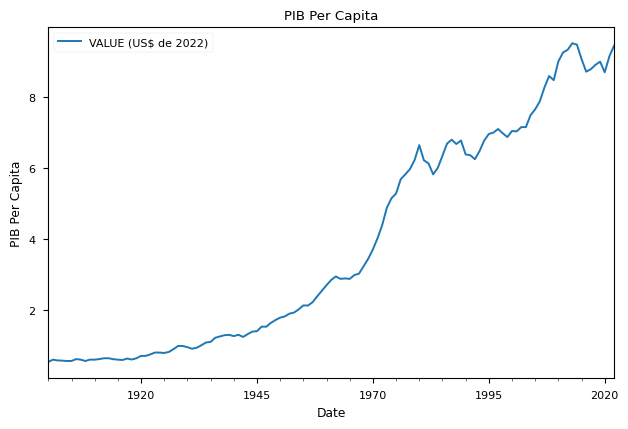

In [15]:
# Visualização gráfica das séries.
plt.style.use('seaborn-paper')
df['VALUE (US$ de 2022)'].plot()
plt.legend(loc='best')
plt.title("PIB Per Capita")
plt.xlabel('Date')
plt.ylabel('PIB Per Capita')
plt.tight_layout()
plt.show()